In [1]:
import sys
import os

base_path = os.path.abspath('..')
sys.path.append(base_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import bar_chart_race as bcr

plt.style.use('bmh')
pd.options.display.max_columns=999

In [3]:
from src.data_download.cleaning import process_liked_songs

In [4]:
import warnings

warnings.filterwarnings("ignore", message="DataFrame is highly fragmented.", category=pd.errors.PerformanceWarning)

In [5]:
df = pd.read_csv(base_path + "/data/liked_songs_raw.csv")
df = process_liked_songs(df)
print(df.shape)
df.head()

(5770, 981)


id                  name  popularity  is_local  \
0  5gciWzZRdQHiWkyBaHPSdB         Kanou Dan Yen          35     False   
1  0Ty1I0eAkYpSGd7MJWXM2n     Gentle Persuasion          27     False   
2  1YN3aermJfsy53lU90Nssf  Life's Gone Down Low          40     False   
3  6BkeuHmO4P69Ln2BSonrXi    Jumpin' Jack Flash          40     False   
4  2YfRKF4sWeV1t1NqBoUgxH   Anchin Kfu Ayinkash          51     False   

   is_explicit  danceability  energy  key  loudness  mode  speechiness  \
0        False         0.763   0.451    4   -10.693     0       0.0397   
1        False         0.594   0.635    1    -8.069     0       0.0411   
2        False         0.607   0.428    0    -8.809     0       0.0720   
3        False         0.523   0.722    6    -6.533     1       0.0307   
4        False         0.471   0.551    5   -10.484     0       0.0291   

   acousticness  instrumentalness  liveness  valence    tempo  date_added  \
0         0.376          0.117000     0.211    0.173  110.001  2024-05-21   
1         0.067          0.782000     0.093    0.709  138.624  2024-05-20   
2         0.518          0.000007     0.201    0.597  153.240  2024-05-20   
3         0.074          0.003360     0.122    0.506  129.424  2024-05-20   
4         0.040          0.147000     0.345    0.692  104.791  2024-05-20   

   year_added month_added  month_index day_of_week_added  day_of_week_index  \
0        2024         May            5           Tuesday                  1   
1        2024         May            5            Monday                  0   
2        2024         May            5            Monday                  0   
3        2024         May            5            Monday                  0   
4        2024         May            5            Monday                  0   

  time_added  duration_s  duration_min                album_id  \
0   11:43:18     214.293      3.571550  1N7ckIzs97RiLEXWgEGgli   
1   12:30:49     405.520      6.758667  1RUBBim9ey8E6Kznw4UIkM   
2   08:55:04     297.162      4.952700  5W7bPvhB7XDg4RcHKSWsQU   
3   08:18:51     215.866      3.597767  24R9CyPLFa0CJrSZ9whlT3   
4   08:06:55     324.880      5.414667  5i6yMY4F7UoOuJD6wRV6NN   

                                          album_name  album_popularity  \
0                                              Fenfo                37   
1  My Name is Doug Hream Blunt: Featuring the Hit...                16   
2                                             Danger                30   
3               Ananda Shankar (US Internet Release)                30   
4                                    Wede Harer Guzo                43   

  album_release_date album_release_date_precision               artist_id  \
0         2018-05-25                          day  4G5ZJny3HvX6Il7eHVfnNC   
1         2015-10-16                          day  19f168OQu5y06r89NVmS55   
2         1976-01-01                          day  1iElGdidl4zFXOpaaem4wZ   
3               1970                         year  5eNWwEF0woj5E5Fnu9qXaQ   
4         2016-06-17                          day  0rsN9DKQhTCvkgbByOOBIm   

          artist_name  artist_popularity  2-step  abstract  abstract beats  \
0   Fatoumata Diawara                 51       0         0               0   
1    Doug Hream Blunt                 16       0         0               0   
2  The Lijadu Sisters                 37       0         0               0   
3      Ananda Shankar                 25       0         0               0   
4        Hailu Mergia                 39       0         0               0   

   abstract hip hop  acid house  acid jazz  acid rock  acid techno  \
0                 0           0          0          0            0   
1                 0           0          0          0            0   
2                 0           0          0          0            0   
3                 0           0          0          0            0   
4                 0           0          0          0            0   

   aco

In [6]:
n_tracks = df.shape[0]
n_tracks

5770

# 1. When were songs saved?

In [83]:
data = df['date_added'].value_counts().reset_index().sort_values(by='date_added')
data['total_tracks'] = data['count'].cumsum()
data.head()

date_added  count  total_tracks
477  2016-02-17      4             4
947  2016-02-18      1             5
101  2016-02-19     11            16
134  2016-02-20      9            25
222  2016-02-21      7            32

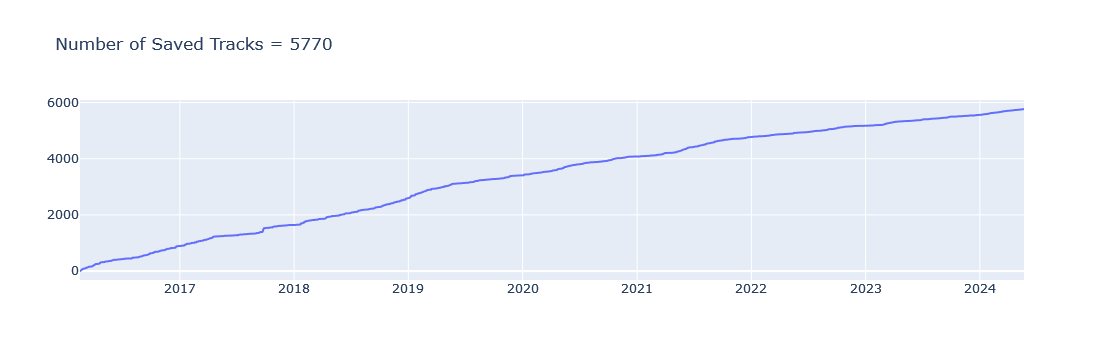

In [84]:
fig = px.line(data, x='date_added', y='total_tracks', title=f"Number of Saved Tracks = {data['total_tracks'].max()}")
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [9]:
data = df['year_added'].value_counts().reset_index().sort_values(by='year_added')
data.head()

year_added  count
1        2016    893
3        2017    748
0        2018    956
2        2019    812
5        2020    669

In [10]:
fig = px.bar(data, x='year_added', y='count', title='Number of Saved Tracks by Year')
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [11]:
data = df[['month_added', 'month_index']].value_counts().reset_index().sort_values(by='month_index')
data['%'] = round(100 * (data['count'] / n_tracks), 2)
data.head()

month_added  month_index  count      %
5     January            1    506   8.77
4    February            2    512   8.87
0       March            3    629  10.90
2       April            4    575   9.97
3         May            5    537   9.31

In [12]:
fig = px.bar(data, x='month_added', y='%', title='% Saved Tracks by Calendar Month')
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [13]:
data = df[['day_of_week_added', 'day_of_week_index']].value_counts().reset_index().sort_values(by='day_of_week_index')
data['%'] = round(100 * (data['count'] / n_tracks), 2)
data.head()

day_of_week_added  day_of_week_index  count      %
0            Monday                  0   1219  21.13
1           Tuesday                  1   1157  20.05
3         Wednesday                  2    842  14.59
2          Thursday                  3    857  14.85
4            Friday                  4    717  12.43

In [14]:
fig = px.bar(data, x='day_of_week_added', y='%', title='Saved Tracks by Day of Week (%)')
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [15]:
import plotly.figure_factory as ff
import scipy

In [16]:
data = df['time_added'].values
data = [[d.hour + (d.minute/60) + (d.second/3600) for d in data]]
group_labels = ['time']

fig = ff.create_distplot(data, group_labels, bin_size=1, show_hist=True, curve_type='kde', show_rug=False)

fig.update_xaxes(
    title_text='Saved Tracks by Time of Day',
    range=[0, 24],
    tickvals=[0, 3, 6, 9, 12, 15, 18, 21],
    ticktext=['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00']
)

fig.update_layout(showlegend=False)

for trace in fig.data:
    trace.hoverinfo = 'none'

fig.show()

# 2. Decades

In [17]:
df[['album_release_date', 'album_release_date_precision']].head()

album_release_date album_release_date_precision
0         2018-05-25                          day
1         2015-10-16                          day
2         1976-01-01                          day
3               1970                         year
4         2016-06-17                          day

In [18]:
df['album_release_year'] = df['album_release_date'].apply(lambda x: x[:4])
df['decade'] = ((df['album_release_year'].astype('int') // 10) * 10).astype('string')
df['decade'] = df['decade'].apply(lambda x: 'Unknown' if x == '0' else x)
df['decade'].head()

0    2010
1    2010
2    1970
3    1970
4    2010
Name: decade, dtype: object

In [19]:
def get_cumulative_stats(data, column):
    # groupby column and get cumulative sum
    groupby_counts = data.groupby(['date_added', column])['id'].count().reset_index().rename(columns={'id':'saved'}).sort_values(by='date_added')
    groupby_counts['cum_saved'] = groupby_counts.groupby(column)['saved'].cumsum()
    
    # Create a DataFrame to cover all dates for each name
    all_dates = pd.date_range(start=groupby_counts['date_added'].min(), end=groupby_counts['date_added'].max(), freq='D')
    all_names = groupby_counts[column].unique()
    idx = pd.MultiIndex.from_product([all_dates, all_names], names=['date_added', column])
    names_dates_cross_join = pd.DataFrame(index=idx).reset_index()
    
    # merge all dates with counts dataframe
    groupby_counts['date_added'] = pd.to_datetime(groupby_counts['date_added'])
    names_dates_cross_join['date_added'] = pd.to_datetime(names_dates_cross_join['date_added'])
    
    stats_all_dates = pd.merge(names_dates_cross_join, groupby_counts, on=['date_added', column], how='left')
    stats_all_dates['saved'] = stats_all_dates['saved'].fillna(0)
    
    stats_all_dates['cum_saved'] = stats_all_dates.groupby(column)['saved'].cumsum().astype('int')
    stats_all_dates = stats_all_dates.sort_values(by=['date_added', 'cum_saved', 'saved'], ascending=[True, False, True])  
    
    # get as % of total
    pivoted = stats_all_dates.pivot(index='date_added', columns=column, values='cum_saved')
    pivoted = pivoted.fillna(0.0)
    
    pivoted_pct = pivoted.div(pivoted.sum(axis=1), axis=0) * 100
    pivoted_pct.head()
    
    # convert to long df
    long = pivoted.reset_index().melt(id_vars=['date_added'], var_name=column, value_name='cum_saved')
    long_pct = pivoted_pct.reset_index().melt(id_vars=['date_added'], var_name=column, value_name='%')
    
    # merge % and totals and return final df
    long_df = pd.merge(long, long_pct, on=['date_added', column])

    return long_df

In [20]:
data = df[df['decade']!='Unknown']
column = 'decade'

long_df = get_cumulative_stats(data, column)
long_df.head()

date_added decade  cum_saved    %
0 2016-02-17   1950          0  0.0
1 2016-02-18   1950          0  0.0
2 2016-02-19   1950          0  0.0
3 2016-02-20   1950          0  0.0
4 2016-02-21   1950          0  0.0

In [21]:
fig = px.area(long_df, x="date_added", y="%", color="decade", line_group=None)

fig.update_layout(
    title='Saved Tracks by Release Decade as (% of Total)',
    xaxis_title='',
    yaxis_title='',
    showlegend=True,
    height=600,
    width=1000
)

fig.show()

In [22]:
fig = px.area(long_df, x="date_added", y="cum_saved", color="decade", line_group=None)

fig.update_layout(
    title='Saved Tracks by Release Decade',
    xaxis_title='',
    yaxis_title='',
    showlegend=True,
    height=600,
    width=1000
)

fig.show()

In [23]:
decades_bcr = long_df.copy()

# keep values for end of month only
months = pd.date_range(start=decades_bcr['date_added'].min(), end=decades_bcr['date_added'].max(), freq='ME')
decades_bcr = decades_bcr[decades_bcr['date_added'].isin(months)]

decades_bcr = decades_bcr.pivot_table(index='date_added', columns='decade', values='cum_saved')
decades_bcr = decades_bcr.fillna(0)
decades_bcr.head()

decade      1950  1960  1970  1980  1990  2000   2010  2020
date_added                                                 
2016-02-29   0.0   0.0   0.0   0.0  15.0  20.0   52.0   0.0
2016-03-31   0.0   1.0   0.0   1.0  37.0  38.0  125.0   0.0
2016-04-30   1.0   3.0   4.0   3.0  45.0  45.0  217.0   0.0
2016-05-31   1.0   3.0   4.0   4.0  53.0  53.0  265.0   0.0
2016-06-30   1.0   3.0   4.0   4.0  54.0  57.0  304.0   0.0

In [24]:
# bcr.bar_chart_race(
#     df=decades_bcr,
#     filename=base_path + '/figures/decades_bcr.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=8,
#     fixed_order=False,
#     fixed_max=False,
#     #steps_per_period=10,
#     interpolate_period=False,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B, %Y',
#     # period_summary_func=lambda v, r: {'x': .99, 'y': .18,
#     #                                   's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
#     #                                   'ha': 'right', 'size': 8, 'family': 'Courier New'},
#     #perpendicular_bar_func='median',
#     #period_length=500,
#     figsize=(5, 3),
#     dpi=144,
#     cmap='dark12',
#     title='Saved Tracks by Decade',
#     title_size='',
#     bar_label_size=7,
#     tick_label_size=7,
#     #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .7},
#     filter_column_colors=True)  

# 3. Explicit

In [25]:
df.head()

id                  name  popularity  is_local  \
0  5gciWzZRdQHiWkyBaHPSdB         Kanou Dan Yen          35     False   
1  0Ty1I0eAkYpSGd7MJWXM2n     Gentle Persuasion          27     False   
2  1YN3aermJfsy53lU90Nssf  Life's Gone Down Low          40     False   
3  6BkeuHmO4P69Ln2BSonrXi    Jumpin' Jack Flash          40     False   
4  2YfRKF4sWeV1t1NqBoUgxH   Anchin Kfu Ayinkash          51     False   

   is_explicit  danceability  energy  key  loudness  mode  speechiness  \
0        False         0.763   0.451    4   -10.693     0       0.0397   
1        False         0.594   0.635    1    -8.069     0       0.0411   
2        False         0.607   0.428    0    -8.809     0       0.0720   
3        False         0.523   0.722    6    -6.533     1       0.0307   
4        False         0.471   0.551    5   -10.484     0       0.0291   

   acousticness  instrumentalness  liveness  valence    tempo  date_added  \
0         0.376          0.117000     0.211    0.173  110.001  2024-05-21   
1         0.067          0.782000     0.093    0.709  138.624  2024-05-20   
2         0.518          0.000007     0.201    0.597  153.240  2024-05-20   
3         0.074          0.003360     0.122    0.506  129.424  2024-05-20   
4         0.040          0.147000     0.345    0.692  104.791  2024-05-20   

   year_added month_added  month_index day_of_week_added  day_of_week_index  \
0        2024         May            5           Tuesday                  1   
1        2024         May            5            Monday                  0   
2        2024         May            5            Monday                  0   
3        2024         May            5            Monday                  0   
4        2024         May            5            Monday                  0   

  time_added  duration_s  duration_min                album_id  \
0   11:43:18     214.293      3.571550  1N7ckIzs97RiLEXWgEGgli   
1   12:30:49     405.520      6.758667  1RUBBim9ey8E6Kznw4UIkM   
2   08:55:04     297.162      4.952700  5W7bPvhB7XDg4RcHKSWsQU   
3   08:18:51     215.866      3.597767  24R9CyPLFa0CJrSZ9whlT3   
4   08:06:55     324.880      5.414667  5i6yMY4F7UoOuJD6wRV6NN   

                                          album_name  album_popularity  \
0                                              Fenfo                37   
1  My Name is Doug Hream Blunt: Featuring the Hit...                16   
2                                             Danger                30   
3               Ananda Shankar (US Internet Release)                30   
4                                    Wede Harer Guzo                43   

  album_release_date album_release_date_precision               artist_id  \
0         2018-05-25                          day  4G5ZJny3HvX6Il7eHVfnNC   
1         2015-10-16                          day  19f168OQu5y06r89NVmS55   
2         1976-01-01                          day  1iElGdidl4zFXOpaaem4wZ   
3               1970                         year  5eNWwEF0woj5E5Fnu9qXaQ   
4         2016-06-17                          day  0rsN9DKQhTCvkgbByOOBIm   

          artist_name  artist_popularity  2-step  abstract  abstract beats  \
0   Fatoumata Diawara                 51       0         0               0   
1    Doug Hream Blunt                 16       0         0               0   
2  The Lijadu Sisters                 37       0         0               0   
3      Ananda Shankar                 25       0         0               0   
4        Hailu Mergia                 39       0         0               0   

   abstract hip hop  acid house  acid jazz  acid rock  acid techno  \
0                 0           0          0          0            0   
1                 0           0          0          0            0   
2                 0           0          0          0            0   
3                 0           0          0          0            0   
4                 0           0          0          0            0   

   aco

In [26]:
explicit = df.groupby('year_added')['is_explicit'].sum().reset_index()
total = df.groupby('year_added')['id'].nunique().reset_index().rename(columns={'id':'total'})

explicit = pd.merge(explicit, total, on='year_added')
explicit['Yes (%)'] = round(100*(explicit['is_explicit']/explicit['total']), 2)
explicit['No (%)'] = 100.0 - explicit['Yes (%)']
explicit

year_added  is_explicit  total  Yes (%)  No (%)
0        2016          412    893    46.14   53.86
1        2017          331    748    44.25   55.75
2        2018          301    956    31.49   68.51
3        2019          288    812    35.47   64.53
4        2020          334    669    49.93   50.07
5        2021          170    693    24.53   75.47
6        2022           45    402    11.19   88.81
7        2023           36    383     9.40   90.60
8        2024           10    214     4.67   95.33

In [27]:
fig = px.bar(explicit, x="year_added", y=["Yes (%)", "No (%)"], title="Explicit Tracks Saved (%)")
fig.update_layout(legend_title_text='Explicit?',xaxis_title='',yaxis_title='')
fig.show()

# 4. Genres

In [28]:
non_genre_cols = [
 'id',
 'name',
 'popularity',
 'is_local',
 'is_explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'date_added',
 'year_added',
 'month_added',
 'month_index',
 'day_of_week_added',
 'day_of_week_index',
 'time_added',
 'duration_s',
 'duration_min',
 'album_id',
 'album_name',
 'album_popularity',
 'album_release_date',
 'album_release_date_precision',
 'artist_id',
 'artist_name',
 'artist_popularity',
 'decade',
 'album_release_year'
]

In [29]:
genres = [col for col in df.drop(columns=non_genre_cols)]

In [30]:
# Melt the DataFrame
genre_df = pd.melt(df, id_vars=['id', 'date_added'], value_vars=genres, var_name='genre', value_name='is_genre')
genre_df = genre_df[genre_df['is_genre'] == 1]
genre_df = genre_df.drop(columns=['is_genre'])
genre_df = genre_df.reset_index(drop=True)

genre_df.head()

id  date_added   genre
0  44Y6mA4opzDud7gnurHavU  2018-12-31  2-step
1  2Sb5XUPtnLNFb7vkuP0mEa  2018-10-30  2-step
2  686HRftCfiFaLfitodtEsx  2018-10-22  2-step
3  7c8RMe4a29gUgMny30CNG8  2017-03-12  2-step
4  2va1wxQAeJ0oGAN0mPD96f  2016-03-17  2-step

In [31]:
long_df = get_cumulative_stats(data=genre_df, column='genre')
long_df.head()

date_added   genre  cum_saved    %
0 2016-02-17  2-step          0  0.0
1 2016-02-18  2-step          0  0.0
2 2016-02-19  2-step          0  0.0
3 2016-02-20  2-step          0  0.0
4 2016-02-21  2-step          0  0.0

In [32]:
genres_bcr = long_df.copy()

# keep values for end of month only
months = pd.date_range(start=genres_bcr['date_added'].min(), end=genres_bcr['date_added'].max(), freq='ME')
genres_bcr = genres_bcr[genres_bcr['date_added'].isin(months)]

genres_bcr = genres_bcr.pivot_table(index='date_added', columns='genre', values='cum_saved')
genres_bcr = genres_bcr.fillna(0)
genres_bcr.head()

genre       2-step  abstract  abstract beats  abstract hip hop  acid house  \
date_added                                                                   
2016-02-29     0.0       0.0             0.0               0.0         0.0   
2016-03-31     3.0       0.0             0.0               0.0         0.0   
2016-04-30     3.0       2.0             0.0               2.0         0.0   
2016-05-31     3.0       2.0             0.0               2.0         0.0   
2016-06-30     3.0       2.0             0.0               2.0         0.0   

genre       acid jazz  acid rock  acid techno  acousmatic  acoustic blues  \
date_added                                                                  
2016-02-29        0.0        0.0          0.0         0.0             0.0   
2016-03-31        0.0        1.0          0.0         0.0             0.0   
2016-04-30        0.0        1.0          0.0         0.0             0.0   
2016-05-31        0.0        1.0          0.0         0.0             0.0   
2016-06-30        0.0        1.0          0.0         0.0             0.0   

genre       adult standards  african electronic  african percussion  \
date_added                                                            
2016-02-29              0.0                 0.0                 0.0   
2016-03-31              0.0                 0.0                 0.0   
2016-04-30              0.0                 0.0                 0.0   
2016-05-31              0.0                 0.0                 0.0   
2016-06-30              0.0                 0.0                 0.0   

genre       afro house  afro psych  afro r&b  afro soul  \
date_added                                                
2016-02-29         0.0         0.0       0.0        0.0   
2016-03-31         0.0         0.0       0.0        0.0   
2016-04-30         0.0         0.0       0.0        0.0   
2016-05-31         0.0         0.0       0.0        0.0   
2016-06-30         0.0         0.0       0.0        0.0   

genre       afro-cuban percussion  afro-funk  afrobeat  afrobeat brasileiro  \
date_added                                                                    
2016-02-29                    0.0        0.0       0.0                  0.0   
2016-03-31                    0.0        0.0       0.0                  0.0   
2016-04-30                    0.0        0.0       1.0                  0.0   
2016-05-31                    0.0        0.0       3.0                  0.0   
2016-06-30                    0.0        0.0       3.0                  0.0   

genre       afrobeat fusion  afrobeats  afrofuturism  \
date_added                                             
2016-02-29              0.0        0.0           3.0   
2016-03-31              0.0        0.0           3.0   
2016-04-30              0.0        0.0           4.0   
2016-05-31              0.0        0.0           4.0   
2016-06-30              0.0        0.0           4.0   

genre       afrofuturismo brasileiro  afropop  afroswing  alabama indie  \
date_added                                                                
2016-02-29                       0.0      0.0        0.0            0.0   
2016-03-31                       0.0      0.0        0.0            0.0   
2016-04-30                       0.0      1.0        0.0            0.0   
2016-05-31                       0.0      3.0        0.0            0.0   
2016-06-30                       0.0      3.0        0.0            0.0   

genre       alabama rap  album rock  alternative  alternative americana  \
date_added                                                                
2016-02-29          0.0         0.0         20.0                    0.0   
2016-03-31          0.0         1.0         27.0                    0.0   
2016-04-30          0.0         4.0         54.0                    0.0   
2016-05-31          0.0         4.0         74.0                    0.0   
2016-06-30          0.0         4.0         81.0                    0.0   

ge

In [33]:
# bcr.bar_chart_race(
#     df=genres_bcr,
#     filename=base_path + '/figures/genres_bcr.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=8,
#     fixed_order=False,
#     fixed_max=False,
#     #steps_per_period=10,
#     interpolate_period=False,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B, %Y',
#     # period_summary_func=lambda v, r: {'x': .99, 'y': .18,
#     #                                   's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
#     #                                   'ha': 'right', 'size': 8, 'family': 'Courier New'},
#     #perpendicular_bar_func='median',
#     #period_length=500,
#     figsize=(5, 3),
#     dpi=144,
#     cmap='dark12',
#     title='Saved Tracks by Genre',
#     title_size='',
#     bar_label_size=7,
#     tick_label_size=7,
#     #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .7},
#     filter_column_colors=True)  

## Caveat the above with the fact songs can have multiple genres.

In [34]:
main_genres = ['pop', 'rock', 'hip hop', 'r&b', 'electro', 'jazz', 'alte', 'funk']

In [35]:
for m in main_genres:
    print(m)
    print(m in genres)

pop
True
rock
True
hip hop
True
r&b
True
electro
False
jazz
True
alte
False
funk
True


In [36]:
genre_counts = df[genres].sum()
genre_counts.sort_values().tail()

soul            933
pop             964
alternative    1142
rap            1194
hip hop        1969
dtype: int64

I think play here is something like:
- use the thing I had previously to determine overlap between two genres
- for each row, each genre gets a score:
- e.g. techno = +0.8 for electro, +0.3 for alte; synth pop = +0.6 for pop, +0.4 for electro
- let's set a threshold already at this point e.g. only add if 0.6 or higher
- so totals: 0.8 for electro, 0.6 for pop
- Then another threshold at this point let's say 0.8? Or maybe only at previous step
- If doesn't make threshold then assign 'Other' as main_genre

In [37]:
genres_only = df.drop(columns=non_genre_cols)

genre_correlations = pd.DataFrame(genres_only.sum().index).rename(columns={0:'genre'})
for genre in genres:
    d = genres_only[genres_only[genre]==1]
    sums = d.sum()
    total = sums[genre]
    
    sums = pd.DataFrame(sums).reset_index().rename(columns={'index':'genre', 0:genre})
    genre_correlations[f'{genre}'] = sums[genre] / total
    
genre_correlations.head()

genre  2-step  abstract  abstract beats  abstract hip hop  \
0            2-step     1.0  0.000000             0.0               0.0   
1          abstract     0.0  1.000000             1.0               1.0   
2    abstract beats     0.0  0.208333             1.0               0.0   
3  abstract hip hop     0.0  0.750000             0.0               1.0   
4        acid house     0.0  0.000000             0.0               0.0   

   acid house  acid jazz  acid rock  acid techno  acousmatic  acoustic blues  \
0         0.0        0.0        0.0          0.0         0.0             0.0   
1         0.0        0.0        0.0          0.0         0.0             0.0   
2         0.0        0.0        0.0          0.0         0.0             0.0   
3         0.0        0.0        0.0          0.0         0.0             0.0   
4         1.0        0.0        0.0          0.0         0.0             0.0   

   adult standards  african electronic  african percussion  afro house  \
0              0.0                 0.0                 0.0         0.0   
1              0.0                 0.0                 0.0         0.0   
2              0.0                 0.0                 0.0         0.0   
3              0.0                 0.0                 0.0         0.0   
4              0.0                 0.0                 0.0         0.0   

   afro psych  afro r&b  afro soul  afro-cuban percussion  afro-funk  \
0         0.0       0.0        0.0                    0.0        0.0   
1         0.0       0.0        0.0                    0.0        0.0   
2         0.0       0.0        0.0                    0.0        0.0   
3         0.0       0.0        0.0                    0.0        0.0   
4         0.0       0.0        0.0                    0.0        0.0   

   afrobeat  afrobeat brasileiro  afrobeat fusion  afrobeats  afrofuturism  \
0       0.0                  0.0              0.0        0.0      0.000000   
1       0.0                  0.0              0.0        0.0      0.009804   
2       0.0                  0.0              0.0        0.0      0.000000   
3       0.0                  0.0              0.0        0.0      0.009804   
4       0.0                  0.0              0.0        0.0      0.000000   

   afrofuturismo brasileiro  afropop  afroswing  alabama indie  alabama rap  \
0                       0.0      0.0        0.0            0.0          0.0   
1                       0.0      0.0        0.0            0.0          0.0   
2                       0.0      0.0        0.0            0.0          0.0   
3                       0.0      0.0        0.0            0.0          0.0   
4                       0.0      0.0        0.0            0.0          0.0   

   album rock  alternative  alternative americana  alternative dance  \
0         0.0     0.000000                    0.0                0.0   
1         0.0     0.031524                    0.0                0.0   
2         0.0     0.002627                    0.0                0.0   
3         0.0     0.028897                    0.0                0.0   
4         0.0     0.000000                    0.0                0.0   

   alternative hip hop  alternative metal  alternative pop rock  \
0             0.000000                0.0                   0.0   
1             0.074380                0.0                   0.0   
2             0.006198                0.0                   0.0   
3             0.068182                0.0                   0.0   
4             0.000000                0.0                   0.0   

   alternative r&b  alternative rock   ambient  ambient country  \
0              0.0               0.0  0.000000              0.0   
1              0.0               0.0  0.012987              0.0   
2              0.0               0.0  0.000000              0.0   
3              0.0               0.0  0.000000              0.0   
4              0.0               0.0  0.000000              0.0   

   ambient house  amb

Reading DOWN the column: of all the entries containing this genre, what proportion of other entries also contain the genre in the row?

In [38]:
genre_correlations = genre_correlations[genre_correlations['genre'].isin(main_genres)].set_index('genre')
genre_correlations

2-step  abstract  abstract beats  abstract hip hop  acid house  \
genre                                                                       
funk     0.142857  0.041667             0.2          0.000000         0.0   
hip hop  0.000000  0.895833             0.7          1.000000         0.0   
jazz     0.000000  0.083333             0.4          0.000000         0.0   
pop      0.000000  0.020833             0.0          0.027778         0.0   
r&b      0.000000  0.062500             0.3          0.000000         0.0   
rock     0.000000  0.000000             0.0          0.000000         0.0   

         acid jazz  acid rock  acid techno  acousmatic  acoustic blues  \
genre                                                                    
funk      0.000000        0.0          0.0         0.0             0.0   
hip hop   0.000000        0.0          0.0         0.0             0.0   
jazz      1.000000        0.0          0.0         0.0             0.0   
pop       0.000000        0.0          0.0         0.0             0.0   
r&b       0.111111        0.0          0.0         0.0             0.0   
rock      0.000000        1.0          0.0         0.0             0.0   

         adult standards  african electronic  african percussion  afro house  \
genre                                                                          
funk            0.000000                 0.0                 0.0         0.0   
hip hop         0.000000                 0.0                 0.0         0.0   
jazz            0.416667                 0.0                 0.0         0.0   
pop             0.333333                 0.0                 0.0         1.0   
r&b             0.000000                 0.0                 0.0         0.0   
rock            0.583333                 0.0                 0.0         0.0   

         afro psych  afro r&b  afro soul  afro-cuban percussion  afro-funk  \
genre                                                                        
funk            0.5       0.0        0.0                    0.0   1.000000   
hip hop         0.0       0.0        0.0                    0.0   0.000000   
jazz            0.0       0.0        0.0                    1.0   0.045455   
pop             0.0       1.0        0.5                    0.0   0.090909   
r&b             0.0       1.0        0.0                    0.0   0.000000   
rock            0.0       0.0        0.0                    0.0   0.000000   

         afrobeat  afrobeat brasileiro  afrobeat fusion  afrobeats  \
genre                                                                
funk     0.195122                  0.0              0.0   0.000000   
hip hop  0.256098                  0.0              0.0   0.666667   
jazz     0.256098                  0.0              0.0   0.000000   
pop      0.597561                  0.0              0.0   0.875000   
r&b      0.024390                  0.0              0.0   0.083333   
rock     0.012195                  0.0              0.0   0.000000   

         afrofuturism  afrofuturismo brasileiro   afropop  afroswing  \
genre                                                                  
funk         0.029412                       0.0  0.159091   0.000000   
hip hop      0.303922                       0.0  0.181818   0.969697   
jazz         0.323529                       0.0  0.454545   0.000000   
pop          0.039216                       0.0  1.000000   0.000000   
r&b          0.480392                       0.0  0.000000   0.000000   
rock         0.029412                       1.0  0.000000   0.000000   

         alabama indie  alabama rap  album rock  alternative  \
genre                                                          
funk               0.0          0.0    0.000000     0.009632   
hip hop            0.0          0.0    0.000000     0.523643   
jazz               0.0          0.0    0.000000     0.027145   
pop                0.0          0.0    0.076923     0.158494   
r&b          

In [39]:
genre='abstract'

data = genre_correlations[[genre]]
data = data[data[genre]>=0.7].sort_values(by=genre, ascending=False)
data

abstract
genre            
hip hop  0.895833

In [40]:
row = genres_only.iloc[0]

In [41]:
row * genre_correlations

2-step  abstract  abstract beats  abstract hip hop  acid house  \
genre                                                                     
funk        0.0       0.0             0.0               0.0         0.0   
hip hop     0.0       0.0             0.0               0.0         0.0   
jazz        0.0       0.0             0.0               0.0         0.0   
pop         0.0       0.0             0.0               0.0         0.0   
r&b         0.0       0.0             0.0               0.0         0.0   
rock        0.0       0.0             0.0               0.0         0.0   

         acid jazz  acid rock  acid techno  acousmatic  acoustic blues  \
genre                                                                    
funk           0.0        0.0          0.0         0.0             0.0   
hip hop        0.0        0.0          0.0         0.0             0.0   
jazz           0.0        0.0          0.0         0.0             0.0   
pop            0.0        0.0          0.0         0.0             0.0   
r&b            0.0        0.0          0.0         0.0             0.0   
rock           0.0        0.0          0.0         0.0             0.0   

         adult standards  african electronic  african percussion  afro house  \
genre                                                                          
funk                 0.0                 0.0                 0.0         0.0   
hip hop              0.0                 0.0                 0.0         0.0   
jazz                 0.0                 0.0                 0.0         0.0   
pop                  0.0                 0.0                 0.0         0.0   
r&b                  0.0                 0.0                 0.0         0.0   
rock                 0.0                 0.0                 0.0         0.0   

         afro psych  afro r&b  afro soul  afro-cuban percussion  afro-funk  \
genre                                                                        
funk            0.0       0.0        0.0                    0.0        0.0   
hip hop         0.0       0.0        0.0                    0.0        0.0   
jazz            0.0       0.0        0.0                    0.0        0.0   
pop             0.0       0.0        0.0                    0.0        0.0   
r&b             0.0       0.0        0.0                    0.0        0.0   
rock            0.0       0.0        0.0                    0.0        0.0   

         afrobeat  afrobeat brasileiro  afrobeat fusion  afrobeats  \
genre                                                                
funk          0.0                  0.0              0.0        0.0   
hip hop       0.0                  0.0              0.0        0.0   
jazz          0.0                  0.0              0.0        0.0   
pop           0.0                  0.0              0.0        0.0   
r&b           0.0                  0.0              0.0        0.0   
rock          0.0                  0.0              0.0        0.0   

         afrofuturism  afrofuturismo brasileiro   afropop  afroswing  \
genre                                                                  
funk              0.0                       0.0  0.159091        0.0   
hip hop           0.0                       0.0  0.181818        0.0   
jazz              0.0                       0.0  0.454545        0.0   
pop               0.0                       0.0  1.000000        0.0   
r&b               0.0                       0.0  0.000000        0.0   
rock              0.0                       0.0  0.000000        0.0   

         alabama indie  alabama rap  album rock  alternative  \
genre                                                          
funk               0.0          0.0         0.0          0.0   
hip hop            0.0          0.0         0.0          0.0   
jazz               0.0          0.0         0.0          0.0   
pop                0.0          0.0         0.0          0.0   
r&b                0.0     

In [42]:
row[row==1]

afropop         1
blues           1
desert blues    1
malian blues    1
mande pop       1
pop             1
soul            1
wassoulou       1
world           1
Name: 0, dtype: int64

In [43]:
multiplied = (row * genre_correlations)
scores = multiplied[multiplied>=0.7].sum(axis=1).sort_values(ascending=False)
scores

genre
pop        5.714286
funk       0.000000
hip hop    0.000000
jazz       0.000000
r&b        0.000000
rock       0.000000
dtype: float64

In [44]:
scores.index[0]

'pop'

In [45]:
scores[0]

/tmp/ipykernel_1035/1449450985.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



5.714285714285714

What is happening?

Correlations
- of this genre, what % of songs also have one of the main genres

Row
- multiply columns where row = 1 by the relative correlations
- sum row wise to get score for each main genre
- only sum those where > 0.7 - want to leave room for 'Other' - don't want spurious correlations to sum up

In [46]:
def assign_main_genre(row):
    multiplied = (row * genre_correlations)
    scores = multiplied[multiplied>=0.7].sum(axis=1).sort_values(ascending=False)

    if scores.iloc[0] > 0:
        return scores.index[0]
    else:
        return 'other'

In [47]:
genres_only = genres_only.copy()
genres_only['main_genre'] = genres_only.apply(lambda row: assign_main_genre(row), axis=1)
genres_only.head()

2-step  abstract  abstract beats  abstract hip hop  acid house  acid jazz  \
0       0         0               0                 0           0          0   
1       0         0               0                 0           0          0   
2       0         0               0                 0           0          0   
3       0         0               0                 0           0          0   
4       0         0               0                 0           0          0   

   acid rock  acid techno  acousmatic  acoustic blues  adult standards  \
0          0            0           0               0                0   
1          0            0           0               0                0   
2          0            0           0               0                0   
3          0            0           0               0                0   
4          0            0           0               0                0   

   african electronic  african percussion  afro house  afro psych  afro r&b  \
0                   0                   0           0           0         0   
1                   0                   0           0           0         0   
2                   0                   0           0           0         0   
3                   0                   0           0           0         0   
4                   0                   0           0           0         0   

   afro soul  afro-cuban percussion  afro-funk  afrobeat  afrobeat brasileiro  \
0          0                      0          0         0                    0   
1          0                      0          0         0                    0   
2          0                      0          0         1                    0   
3          0                      0          0         0                    0   
4          0                      0          0         0                    0   

   afrobeat fusion  afrobeats  afrofuturism  afrofuturismo brasileiro  \
0                0          0             0                         0   
1                0          0             0                         0   
2                0          0             0                         0   
3                0          0             0                         0   
4                0          0             0                         0   

   afropop  afroswing  alabama indie  alabama rap  album rock  alternative  \
0        1          0              0            0           0            0   
1        0          0              0            0           0            0   
2        1          0              0            0           0            0   
3        0          0              0            0           0            0   
4        0          0              0            0           0            0   

   alternative americana  alternative dance  alternative hip hop  \
0                      0                  0                    0   
1                      0                  0                    0   
2                      0                  0                    0   
3                      0                  0                    0   
4                      0                  0                    0   

   alternative metal  alternative pop rock  alternative r&b  alternative rock  \
0                  0                     0                0                 0   
1                  0                     0                0                 0   
2                  0                     0                0                 0   
3                  0                     0                0                 0   
4                  0                     0                0                 0   

   ambient  ambient country  ambient house  ambient idm  ambient pop  \
0        0                0              0            0            0   
1        0                0              0            0            0   
2        0                0              0            0            0   
3        0             

In [48]:
genres_only.main_genre.value_counts()

main_genre
hip hop    1949
other      1773
pop         644
r&b         603
rock        302
jazz        280
funk        219
Name: count, dtype: int64

As extension could string match e.g. indie and psychedelic as they have a few sub genres.

Mention that similarly could do this for other genres e.g. japanese

In [49]:
df['main_genre'] = genres_only['main_genre']

In [50]:
data = df.groupby(['main_genre'])['id'].count().reset_index().rename(columns={'id':'count'})
data = data.sort_values(by='count')
data.head()

fig = px.bar(data, x='main_genre', y='count', title=f'Saved Tracks by Genre ')
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [51]:
data = df.groupby(['year_added', 'main_genre'])['id'].count().reset_index().rename(columns={'id':'count'})

year = 2020
data = data[data['year_added']==year]
data = data.sort_values(by='count')
data.head()

fig = px.bar(data, x='main_genre', y='count', title=f'Saved Tracks by Genre - {year}')
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [52]:
data = df.groupby(['year_added', 'main_genre'])['id'].count().reset_index().rename(columns={'id':'count'})
year_total = data.groupby('year_added')['count'].sum().reset_index().rename(columns={'count':'year_total'})
data = pd.merge(data, year_total, on='year_added')
data['%'] = round(100*(data['count']/data['year_total']), 2)
data.head()

year_added main_genre  count  year_total      %
0        2016       funk     28         893   3.14
1        2016    hip hop    470         893  52.63
2        2016       jazz     17         893   1.90
3        2016      other    182         893  20.38
4        2016        pop     62         893   6.94

In [53]:
data.pivot(columns=['main_genre'], index='year_added', values='%')

main_genre  funk  hip hop  jazz  other    pop    r&b   rock
year_added                                                 
2016        3.14    52.63  1.90  20.38   6.94  10.97   4.03
2017        2.67    45.45  4.55  25.13   8.56  12.43   1.20
2018        4.18    31.28  6.59  38.49   6.07   8.58   4.81
2019        3.82    33.13  4.93  30.17   8.25  13.92   5.79
2020        5.08    46.49  2.99  17.79  10.16  13.60   3.89
2021        5.05    22.37  5.63  29.73  17.03  14.00   6.20
2022        4.23    11.44  9.20  48.26  17.41   2.49   6.97
2023        1.57    11.75  4.96  45.69  22.19   3.66  10.18
2024        3.74     6.54  5.14  44.86  24.30   2.34  13.08

In [54]:
fig = px.line_polar(data, r='%', theta='main_genre', line_close=True, color='year_added', title=f'Saved Tracks by Genre (%)')

fig.update_layout(
    height=600,  # set height in pixels
    width=800,   # set width in pixels
)

# Set the range of the radial axis to 0-100
fig.update_polars(radialaxis=dict(range=[0, 60]))

# only highlight first and last year by default
fig.for_each_trace(lambda trace: trace.update(visible=True) if trace.legendgroup in [str(data['year_added'].min()), str(data['year_added'].max())] else (trace.update(visible="legendonly")))

fig.show()

In [55]:
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'polar'}]*3]*3, subplot_titles=[str(year) for year in data.year_added.unique()])

axis_mapping = {
    0:{0:1, 1:1},
    1:{0:1, 1:2},
    2:{0:1, 1:3},
    3:{0:2, 1:1},
    4:{0:2, 1:2},
    5:{0:2, 1:3},
    6:{0:3, 1:1},
    7:{0:3, 1:2},
    8:{0:3, 1:3}
}

for i, year in enumerate(data.year_added.unique()):
    yearly_data = data[data['year_added']==year]
    fig.add_trace(
        go.Scatterpolar(
            name=str(year),
            r=yearly_data['%'],
            theta=yearly_data['main_genre']
        ), axis_mapping[i][0], axis_mapping[i][1])

    

fig.update_traces(fill='toself')

fig.update_layout(
    height=900,  # set height in pixels
    width=900,   # set width in pixels
    margin=dict(l=0, r=0, t=30, b=30),
    showlegend=False,
)

# Update layout to hide the radial axis labels
for i in range(9):
    fig.update_layout({
        f'polar{i+1}': dict(
            radialaxis=dict(showticklabels=False)
        ),
        f'polar{i+1}.radialaxis': dict(range=[0, 60])
    })

fig.show()

In [56]:
specs=[[{'type': 'polar'}]*9]
specs

[[{'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'},
  {'type': 'polar'}]]

In [57]:
fig = make_subplots(rows=9, cols=1, specs=[[{'type': 'polar'}]]*9)#, subplot_titles=[str(year) for year in data.year_added.unique()])

for i, year in enumerate(data.year_added.unique()):
    yearly_data = data[data['year_added']==year]
    fig.add_trace(
        go.Scatterpolar(
            name=str(year),
            r=yearly_data['%'],
            theta=yearly_data['main_genre']
        ), i+1,1)

    

fig.update_traces(fill='toself')

fig.update_layout(
    height=2700,  # set height in pixels
    width=300,   # set width in pixels
    margin=dict(l=0, r=0, t=30, b=30),
    showlegend=False,
)

# Update layout to hide the radial axis labels
for i in range(9):
    fig.update_layout({
        f'polar{i+1}': dict(
            radialaxis=dict(showticklabels=False)
        ),
        f'polar{i+1}.radialaxis': dict(range=[0, 60])
    })

fig.show()

In [58]:
column = 'main_genre'

long_df = get_cumulative_stats(df, column)
long_df.head()

date_added main_genre  cum_saved    %
0 2016-02-17       funk          0  0.0
1 2016-02-18       funk          0  0.0
2 2016-02-19       funk          0  0.0
3 2016-02-20       funk          0  0.0
4 2016-02-21       funk          0  0.0

In [59]:
main_genres_bcr = long_df.copy()

# keep values for end of month only
months = pd.date_range(start=main_genres_bcr['date_added'].min(), end=main_genres_bcr['date_added'].max(), freq='ME')
main_genres_bcr = main_genres_bcr[main_genres_bcr['date_added'].isin(months)]

main_genres_bcr = main_genres_bcr.pivot_table(index='date_added', columns='main_genre', values='cum_saved')
main_genres_bcr = main_genres_bcr.fillna(0)
main_genres_bcr.head()

main_genre  funk  hip hop  jazz  other   pop   r&b  rock
date_added                                              
2016-02-29   0.0     57.0   0.0   11.0  13.0   6.0   0.0
2016-03-31   3.0    128.0   0.0   45.0  15.0   6.0   5.0
2016-04-30   7.0    178.0   4.0   74.0  23.0  22.0  10.0
2016-05-31   8.0    202.0   5.0   86.0  29.0  41.0  12.0
2016-06-30   8.0    220.0  10.0   97.0  33.0  47.0  12.0

In [60]:
# bcr.bar_chart_race(
#     df=main_genres_bcr,
#     filename=base_path + '/figures/main_genres_bcr.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=8,
#     fixed_order=False,
#     fixed_max=False,
#     #steps_per_period=10,
#     interpolate_period=False,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B, %Y',
#     # period_summary_func=lambda v, r: {'x': .99, 'y': .18,
#     #                                   's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
#     #                                   'ha': 'right', 'size': 8, 'family': 'Courier New'},
#     #perpendicular_bar_func='median',
#     #period_length=500,
#     figsize=(5, 3),
#     dpi=144,
#     cmap='dark12',
#     title='Saved Tracks by Genre',
#     title_size='',
#     bar_label_size=7,
#     tick_label_size=7,
#     #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .7},
#     filter_column_colors=True)  

# 5. Artists

In [62]:
column = 'artist_name'

long_df = get_cumulative_stats(df, column)
long_df.head()

date_added artist_name  cum_saved    %
0 2016-02-17      $kinny          0  0.0
1 2016-02-18      $kinny          0  0.0
2 2016-02-19      $kinny          0  0.0
3 2016-02-20      $kinny          0  0.0
4 2016-02-21      $kinny          0  0.0

In [69]:
artists_bcr = long_df.copy()
artists_bcr['artist_name'] = artists_bcr['artist_name'].str.replace(r'\$', 's', regex=True)

# keep values for end of month only
months = pd.date_range(start=artists_bcr['date_added'].min(), end=artists_bcr['date_added'].max(), freq='ME')
artists_bcr = artists_bcr[artists_bcr['date_added'].isin(months)]

artists_bcr = artists_bcr.pivot_table(index='date_added', columns='artist_name', values='cum_saved')
artists_bcr = artists_bcr.fillna(0)
artists_bcr.head()

artist_name  &ME  (dc)  2 Chainz  21 Savage  2Pac  40 Thieves  50 Cent   67  \
date_added                                                                    
2016-02-29   0.0   0.0       0.0        0.0   0.0         0.0      0.0  0.0   
2016-03-31   0.0   0.0       0.0        0.0   0.0         0.0      0.0  0.0   
2016-04-30   0.0   0.0       0.0        0.0   0.0         0.0      0.0  0.0   
2016-05-31   0.0   0.0       0.0        0.0   6.0         0.0      0.0  0.0   
2016-06-30   0.0   0.0       0.0        0.0   6.0         0.0      0.0  0.0   

artist_name  6LACK  808 State  808INK  9th Creation  9th Wonder  \
date_added                                                        
2016-02-29     0.0        0.0     0.0           0.0         0.0   
2016-03-31     0.0        0.0     0.0           0.0         0.0   
2016-04-30     0.0        0.0     0.0           0.0         0.0   
2016-05-31     0.0        0.0     0.0           0.0         0.0   
2016-06-30     0.0        0.0     0.0           0.0         0.0   

artist_name  A Touch Of Class  A Tribe Called Quest  A.CHAL  ABRA  ABSOLUTE.  \
date_added                                                                     
2016-02-29                0.0                   3.0     0.0   0.0        0.0   
2016-03-31                0.0                   5.0     0.0   0.0        0.0   
2016-04-30                0.0                   6.0     0.0   0.0        0.0   
2016-05-31                0.0                   6.0     0.0   0.0        0.0   
2016-06-30                0.0                   6.0     0.0   0.0        0.0   

artist_name  AC/DC  AJ Tracey  ALYSS  AVNU (UK)  Aaron May  Aaron Unknown  \
date_added                                                                  
2016-02-29     0.0        0.0    0.0        0.0        0.0            0.0   
2016-03-31     0.0        0.0    0.0        0.0        0.0            0.0   
2016-04-30     0.0        0.0    0.0        0.0        0.0            0.0   
2016-05-31     0.0        0.0    0.0        0.0        0.0            0.0   
2016-06-30     0.0        0.0    0.0        0.0        0.0            0.0   

artist_name  Ab-Soul  AceMo  Acid Washed  Acidslop  Action Bronson  Actress  \
date_added                                                                    
2016-02-29       0.0    0.0          0.0       0.0             0.0      0.0   
2016-03-31       1.0    0.0          0.0       0.0             0.0      0.0   
2016-04-30       1.0    0.0          0.0       0.0             0.0      0.0   
2016-05-31       1.0    0.0          0.0       0.0             0.0      0.0   
2016-06-30       1.0    0.0          0.0       0.0             0.0      0.0   

artist_name  Adam Betts  Adam Beyer  Adam Snow  Addison Groove  Adele  Admas  \
date_added                                                                     
2016-02-29          0.0         0.0        0.0             0.0    0.0    0.0   
2016-03-31          0.0         0.0        0.0             0.0    0.0    0.0   
2016-04-30          0.0         0.0        0.0             0.0    0.0    0.0   
2016-05-31          0.0         0.0        0.0             0.0    0.0    0.0   
2016-06-30          0.0         0.0        0.0             0.0    0.0    0.0   

artist_name  Aesop Rock  Afriquoi  Against All Logic  Agar Agar  \
date_added                                                        
2016-02-29          0.0       0.0                0.0        0.0   
2016-03-31          0.0       0.0                0.0        0.0   
2016-04-30          0.0       0.0                0.0        0.0   
2016-05-31          0.0       0.0                0.0        0.0   
2016-06-30          0.0       0.0                0.0        0.0   

artist_name  Aged In Harmony  Agnes  Agoria  Agua Re  Aim  Air  Akala  \
date_added                                                              
2016-02-29               0.0    0.0     0.0      0.0  0.0  0.0    0.0   
2016-03-31               0.0    0.0     0.0      0.0  0.0  0.0    0.0  

In [70]:
# bcr.bar_chart_race(
#     df=artists_bcr,
#     filename=base_path + '/figures/artists_bcr.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=8,
#     fixed_order=False,
#     fixed_max=False,
#     #steps_per_period=10,
#     interpolate_period=False,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B, %Y',
#     # period_summary_func=lambda v, r: {'x': .99, 'y': .18,
#     #                                   's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
#     #                                   'ha': 'right', 'size': 8, 'family': 'Courier New'},
#     #perpendicular_bar_func='median',
#     #period_length=500,
#     figsize=(5, 3),
#     dpi=144,
#     cmap='dark12',
#     title='Saved Tracks by Artist',
#     title_size='',
#     bar_label_size=7,
#     tick_label_size=7,
#     #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .7},
#     filter_column_colors=True)  

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/

### Unique Artists

In [73]:
unique_artists = df.sort_values(by='date_added')
unique_artists = unique_artists.drop_duplicates(subset='artist_name', keep='first')
unique_artists.head()

id                     name  popularity  is_local  \
5769  2MXg8JEeTLUoWXefisRdwQ      Smoke & Retribution           0     False   
5766  0eEXcw3JLVXcRxYrVYMy68      Electric Relaxation          68     False   
5765  3PFaFVWq5wucLu6s4baj9D  Girl (feat. KAYTRANADA)          64     False   
5763  5ijr4mcVJokrKmtBy1XRPY              The Morning           0     False   
5754  73eGiraiU7JkIsmFyQyJAv                     Real          55     False   

      is_explicit  danceability  energy  key  loudness  mode  speechiness  \
5769         True         0.746   0.572    8    -6.019     1       0.3330   
5766        False         0.866   0.534   11    -9.201     1       0.2290   
5765         True         0.568   0.420    7   -11.169     0       0.2760   
5763         True         0.656   0.555    6    -7.600     0       0.0374   
5754         True         0.652   0.458    1   -12.272     1       0.1940   

      acousticness  instrumentalness  liveness  valence    tempo  date_added  \
5769        0.1680             0.000    0.0922    0.442  120.898  2016-02-17   
5766        0.1840             0.266    0.0929    0.841   98.243  2016-02-17   
5765        0.5360             0.124    0.1010    0.453   79.890  2016-02-18   
5763        0.3400             0.000    0.0993    0.224  120.096  2016-02-19   
5754        0.0282             0.000    0.6640    0.174  100.049  2016-02-19   

      year_added month_added  month_index day_of_week_added  \
5769        2016    February            2         Wednesday   
5766        2016    February            2         Wednesday   
5765        2016    February            2          Thursday   
5763        2016    February            2            Friday   
5754        2016    February            2            Friday   

      day_of_week_index time_added  duration_s  duration_min  \
5769                  2   08:16:25     241.282      4.021367   
5766                  2   18:14:01     226.133      3.768883   
5765                  3   15:26:32     415.613      6.926883   
5763                  4   16:49:05     312.426      5.207100   
5754                  4   20:27:39     443.413      7.390217   

                    album_id                       album_name  \
5769  7gbMNuFinrPbpcjp3rymgx              Smoke & Retribution   
5766  3FAK4h4t9uV4JxzESXllAU                    The Anthology   
5765  69g3CtOVg98TPOwqmI2K7Q                        Ego Death   
5763  7g9RcHiOu1Di3B4Js96Fz5                          Trilogy   
5754  748dZDqSZy6aPXKcI9H80u  good kid, m.A.A.d city (Deluxe)   

      album_popularity album_release_date album_release_date_precision  \
5769                 0         2016-01-28                          day   
5766                56         1999-10-26                          day   
5765                59         2015-06-26                          day   
5763                 0         2012-01-01                          day   
5754                70         2012-10-22                          day   

                   artist_id           artist_name  artist_popularity  2-step  \
5769  6nxWCVXbOlEVRexSbLsTer                 Flume                 68       0   
5766  09hVIj6vWgoCDtT03h8ZCa  A Tribe Called Quest                 64       0   
5765  7GN9PivdemQRKjDt4z5Zv8          The Internet                 57       0   
5763  1Xyo4u8uXC1ZmMpatF05PJ            The Weeknd                 91       0   
5754  2YZyLoL8N0Wb9xBt1NhZWg        Kendrick Lamar                 91       0   

      abstract  abstract beats  abstract hip hop  acid house  acid jazz  \
5769         0               0                 0           0          0   
5766         0               0                 0           0          0   
5765         0               0                 0           0          0   
5763         0               0                 0           0          0   
5754         0               0                 0           0          0   

      acid rock  acid techno  acousmatic  acoustic blues  adult stand

In [78]:
unique_artist_counts = unique_artists.groupby('date_added')['artist_name'].count().reset_index().rename(columns={'artist_name':'new_artists'})
unique_artist_counts['cum_artists'] = unique_artist_counts['new_artists'].cumsum()
unique_artist_counts.head()

date_added  new_artists  cum_artists
0  2016-02-17            2            2
1  2016-02-18            1            3
2  2016-02-19            6            9
3  2016-02-20            3           12
4  2016-02-21            3           15

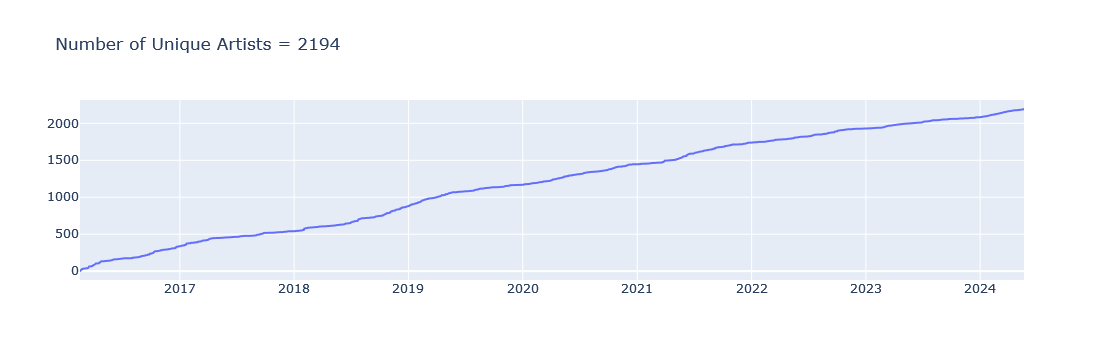

In [82]:
fig = px.line(unique_artist_counts, x='date_added', y='cum_artists', title=f"Number of Unique Artists = {unique_artist_counts['cum_artists'].max()}")
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()

In [85]:
unique_artists.head()

id                     name  popularity  is_local  \
5769  2MXg8JEeTLUoWXefisRdwQ      Smoke & Retribution           0     False   
5766  0eEXcw3JLVXcRxYrVYMy68      Electric Relaxation          68     False   
5765  3PFaFVWq5wucLu6s4baj9D  Girl (feat. KAYTRANADA)          64     False   
5763  5ijr4mcVJokrKmtBy1XRPY              The Morning           0     False   
5754  73eGiraiU7JkIsmFyQyJAv                     Real          55     False   

      is_explicit  danceability  energy  key  loudness  mode  speechiness  \
5769         True         0.746   0.572    8    -6.019     1       0.3330   
5766        False         0.866   0.534   11    -9.201     1       0.2290   
5765         True         0.568   0.420    7   -11.169     0       0.2760   
5763         True         0.656   0.555    6    -7.600     0       0.0374   
5754         True         0.652   0.458    1   -12.272     1       0.1940   

      acousticness  instrumentalness  liveness  valence    tempo  date_added  \
5769        0.1680             0.000    0.0922    0.442  120.898  2016-02-17   
5766        0.1840             0.266    0.0929    0.841   98.243  2016-02-17   
5765        0.5360             0.124    0.1010    0.453   79.890  2016-02-18   
5763        0.3400             0.000    0.0993    0.224  120.096  2016-02-19   
5754        0.0282             0.000    0.6640    0.174  100.049  2016-02-19   

      year_added month_added  month_index day_of_week_added  \
5769        2016    February            2         Wednesday   
5766        2016    February            2         Wednesday   
5765        2016    February            2          Thursday   
5763        2016    February            2            Friday   
5754        2016    February            2            Friday   

      day_of_week_index time_added  duration_s  duration_min  \
5769                  2   08:16:25     241.282      4.021367   
5766                  2   18:14:01     226.133      3.768883   
5765                  3   15:26:32     415.613      6.926883   
5763                  4   16:49:05     312.426      5.207100   
5754                  4   20:27:39     443.413      7.390217   

                    album_id                       album_name  \
5769  7gbMNuFinrPbpcjp3rymgx              Smoke & Retribution   
5766  3FAK4h4t9uV4JxzESXllAU                    The Anthology   
5765  69g3CtOVg98TPOwqmI2K7Q                        Ego Death   
5763  7g9RcHiOu1Di3B4Js96Fz5                          Trilogy   
5754  748dZDqSZy6aPXKcI9H80u  good kid, m.A.A.d city (Deluxe)   

      album_popularity album_release_date album_release_date_precision  \
5769                 0         2016-01-28                          day   
5766                56         1999-10-26                          day   
5765                59         2015-06-26                          day   
5763                 0         2012-01-01                          day   
5754                70         2012-10-22                          day   

                   artist_id           artist_name  artist_popularity  2-step  \
5769  6nxWCVXbOlEVRexSbLsTer                 Flume                 68       0   
5766  09hVIj6vWgoCDtT03h8ZCa  A Tribe Called Quest                 64       0   
5765  7GN9PivdemQRKjDt4z5Zv8          The Internet                 57       0   
5763  1Xyo4u8uXC1ZmMpatF05PJ            The Weeknd                 91       0   
5754  2YZyLoL8N0Wb9xBt1NhZWg        Kendrick Lamar                 91       0   

      abstract  abstract beats  abstract hip hop  acid house  acid jazz  \
5769         0               0                 0           0          0   
5766         0               0                 0           0          0   
5765         0               0                 0           0          0   
5763         0               0                 0           0          0   
5754         0               0                 0           0          0   

      acid rock  acid techno  acousmatic  acoustic blues  adult stand

In [89]:
# Melt the DataFrame
genre_df = pd.melt(unique_artists, id_vars=['id', 'date_added'], value_vars=genres, var_name='genre', value_name='is_genre')
genre_df = genre_df[genre_df['is_genre'] == 1]
genre_df = genre_df.drop(columns=['is_genre'])
genre_df = genre_df.reset_index(drop=True)

genre_df.head()

id  date_added   genre
0  2va1wxQAeJ0oGAN0mPD96f  2016-03-17  2-step
1  1AqlUjWgtEhvosGapJmfnL  2016-03-17  2-step
2  5R3PpVbhR0p3B48dQAHXB9  2016-03-17  2-step
3  7c8RMe4a29gUgMny30CNG8  2017-03-12  2-step
4  686HRftCfiFaLfitodtEsx  2018-10-22  2-step

In [90]:
column = 'genre'

long_df = get_cumulative_stats(genre_df, column)
long_df.head()

date_added   genre  cum_saved    %
0 2016-02-17  2-step          0  0.0
1 2016-02-18  2-step          0  0.0
2 2016-02-19  2-step          0  0.0
3 2016-02-20  2-step          0  0.0
4 2016-02-21  2-step          0  0.0

In [91]:
unique_artists_by_genre_bcr = long_df.copy()

# keep values for end of month only
months = pd.date_range(start=unique_artists_by_genre_bcr['date_added'].min(), end=unique_artists_by_genre_bcr['date_added'].max(), freq='ME')
unique_artists_by_genre_bcr = unique_artists_by_genre_bcr[unique_artists_by_genre_bcr['date_added'].isin(months)]

unique_artists_by_genre_bcr = unique_artists_by_genre_bcr.pivot_table(index='date_added', columns='genre', values='cum_saved')
unique_artists_by_genre_bcr = unique_artists_by_genre_bcr.fillna(0)
unique_artists_by_genre_bcr.head()

genre       2-step  abstract  abstract beats  abstract hip hop  acid house  \
date_added                                                                   
2016-02-29     0.0       0.0             0.0               0.0         0.0   
2016-03-31     3.0       0.0             0.0               0.0         0.0   
2016-04-30     3.0       2.0             0.0               2.0         0.0   
2016-05-31     3.0       2.0             0.0               2.0         0.0   
2016-06-30     3.0       2.0             0.0               2.0         0.0   

genre       acid jazz  acid rock  acid techno  acousmatic  acoustic blues  \
date_added                                                                  
2016-02-29        0.0        0.0          0.0         0.0             0.0   
2016-03-31        0.0        1.0          0.0         0.0             0.0   
2016-04-30        0.0        1.0          0.0         0.0             0.0   
2016-05-31        0.0        1.0          0.0         0.0             0.0   
2016-06-30        0.0        1.0          0.0         0.0             0.0   

genre       adult standards  african electronic  african percussion  \
date_added                                                            
2016-02-29              0.0                 0.0                 0.0   
2016-03-31              0.0                 0.0                 0.0   
2016-04-30              0.0                 0.0                 0.0   
2016-05-31              0.0                 0.0                 0.0   
2016-06-30              0.0                 0.0                 0.0   

genre       afro house  afro psych  afro r&b  afro soul  \
date_added                                                
2016-02-29         0.0         0.0       0.0        0.0   
2016-03-31         0.0         0.0       0.0        0.0   
2016-04-30         0.0         0.0       0.0        0.0   
2016-05-31         0.0         0.0       0.0        0.0   
2016-06-30         0.0         0.0       0.0        0.0   

genre       afro-cuban percussion  afro-funk  afrobeat  afrobeat brasileiro  \
date_added                                                                    
2016-02-29                    0.0        0.0       0.0                  0.0   
2016-03-31                    0.0        0.0       0.0                  0.0   
2016-04-30                    0.0        0.0       1.0                  0.0   
2016-05-31                    0.0        0.0       1.0                  0.0   
2016-06-30                    0.0        0.0       1.0                  0.0   

genre       afrobeat fusion  afrobeats  afrofuturism  \
date_added                                             
2016-02-29              0.0        0.0           2.0   
2016-03-31              0.0        0.0           2.0   
2016-04-30              0.0        0.0           3.0   
2016-05-31              0.0        0.0           3.0   
2016-06-30              0.0        0.0           3.0   

genre       afrofuturismo brasileiro  afropop  afroswing  alabama indie  \
date_added                                                                
2016-02-29                       0.0      0.0        0.0            0.0   
2016-03-31                       0.0      0.0        0.0            0.0   
2016-04-30                       0.0      1.0        0.0            0.0   
2016-05-31                       0.0      1.0        0.0            0.0   
2016-06-30                       0.0      1.0        0.0            0.0   

genre       alabama rap  album rock  alternative  alternative americana  \
date_added                                                                
2016-02-29          0.0         0.0          7.0                    0.0   
2016-03-31          0.0         1.0         11.0                    0.0   
2016-04-30          0.0         3.0         23.0                    0.0   
2016-05-31          0.0         3.0         26.0                    0.0   
2016-06-30          0.0         3.0         29.0                    0.0   

ge

In [92]:
# bcr.bar_chart_race(
#     df=unique_artists_by_genre_bcr,
#     filename=base_path + '/figures/unique_artists_by_genre_bcr.mp4',
#     orientation='h',
#     sort='desc',
#     n_bars=8,
#     fixed_order=False,
#     fixed_max=False,
#     #steps_per_period=10,
#     interpolate_period=False,
#     label_bars=True,
#     bar_size=.95,
#     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
#     period_fmt='%B, %Y',
#     # period_summary_func=lambda v, r: {'x': .99, 'y': .18,
#     #                                   's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
#     #                                   'ha': 'right', 'size': 8, 'family': 'Courier New'},
#     #perpendicular_bar_func='median',
#     #period_length=500,
#     figsize=(5, 3),
#     dpi=144,
#     cmap='dark12',
#     title='Unique Artists by Genre',
#     title_size='',
#     bar_label_size=7,
#     tick_label_size=7,
#     #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
#     scale='linear',
#     writer=None,
#     fig=None,
#     bar_kwargs={'alpha': .7},
#     filter_column_colors=True)  

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from font(s) DejaVu Sans.

/home/bartek/anaconda3/envs/spotify_env/lib/python3.10/site-packages/bar_chart_race/

# 6. Popularity